In [2]:
import pandas as pd
df = pd.read_pickle("dbDfConversion_checkpoint.pkl")

In [3]:
len(df["description"].dropna())

9323

In [5]:
df2 = pd.read_pickle("BCB_updated.pkl")

In [6]:
df2

,name,content,description
0,10000061.java,"private void insertHelper(ForceItem p, Qua...",Inserts a force item into a quadtree node.
1,10000064.java,"private void forceHelper(ForceItem item, Q...",Calculates gravitational forces between items ...
2,10000767.java,private void initialize() throws Sched...,Initializes a job file from classpath or local...
3,10000832.java,public static void main(String[] args) {\n...,Processes command-line arguments and initializ...
4,10001179.java,public RestServiceResult createPublication...,Manages publication material associations.
...,...,...,...
73314,999919.java,public static KeyStore getClientKeyStore(S...,Generates or retrieves a client keystore for a...
73315,9999618.java,@Override\n public String toString() {\...,Overrides toString method to provide detailed ...
73316,9999814.java,@Test\n public void testParseRegisterSe...,Tests parsing Register Sensor Response.
73317,9999815.java,@Test\n public void testParseInsertMeas...,Tests parsing and receiving an InsertObservati...


In [ ]:
#pickle dataset
import pandas as pd
import os

# Ścieżka do folderu z plikami
folder_path = './dataset/id2sourcecode'

# nazwa datasetu
DATASET_NAME = 'BCB'

# Lista do przechowywania danych
data = []

# Iteracja po plikach w folderze
for filename in os.listdir(folder_path):
    if filename.endswith('.java'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        data.append({
            'name': filename,
            'content': content,
            'description': ''
        })

# Tworzenie DataFrame
df = pd.DataFrame(data)

# Zapis do pliku pickle
df.to_pickle(f"{DATASET_NAME}.pkl")

In [ ]:
df

,name,content,description
0,10000061.java,"private void insertHelper(ForceItem p, Qua...",
1,10000064.java,"private void forceHelper(ForceItem item, Q...",
2,10000767.java,private void initialize() throws Sched...,
3,10000832.java,public static void main(String[] args) {\n...,
4,10001179.java,public RestServiceResult createPublication...,
...,...,...,...
73314,999919.java,public static KeyStore getClientKeyStore(S...,
73315,9999618.java,@Override\n public String toString() {\...,
73316,9999814.java,@Test\n public void testParseRegisterSe...,
73317,9999815.java,@Test\n public void testParseInsertMeas...,


In [ ]:
max(df["content"].apply(len))

137727

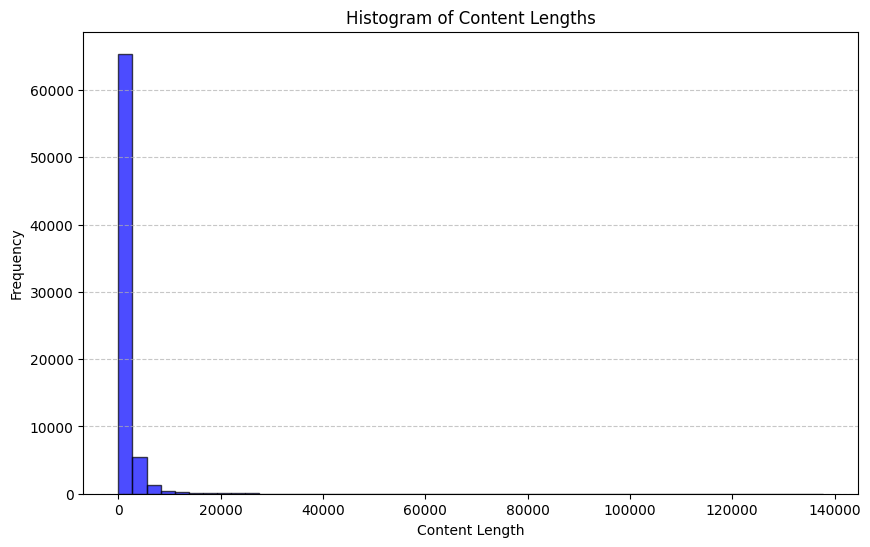

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate the lengths of the 'content' column
content_lengths = df["content"].apply(len)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(content_lengths, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Content Lengths")
plt.xlabel("Content Length")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [49]:
# Importy
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans


# Usunięcie brakujących wartości w kolumnie 'description'
descriptions = df2["description"].dropna()

# Tworzenie osadzeń zdań za pomocą SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(descriptions.tolist())

# Grupowanie za pomocą KMeans
num_clusters = 100  # Możesz dostosować liczbę klastrów
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df2['cluster'] = kmeans.fit_predict(embeddings)

# Wyświetlenie wyników
print(df2[['description', 'cluster']].head())

                                         description  cluster
0         Inserts a force item into a quadtree node.       61
1  Calculates gravitational forces between items ...       47
2  Initializes a job file from classpath or local...       26
3  Processes command-line arguments and initializ...       46
4         Manages publication material associations.       64


In [51]:
df2.to_pickle("BCB_updated_clustered_KMeans_100.pkl")

<Axes: xlabel='cluster'>

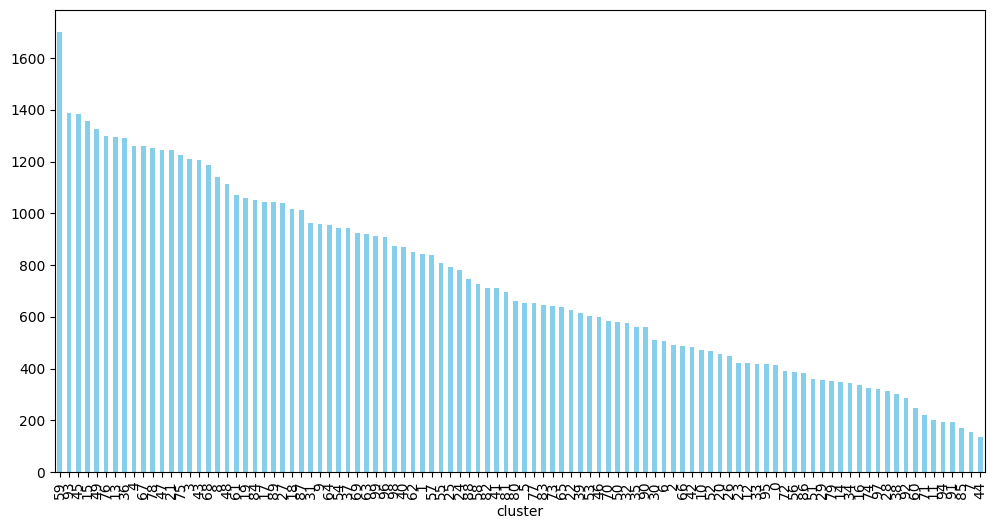

In [50]:
df2['cluster'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')

In [10]:
BCB_nonclones_df = pd.read_csv("BCB_nonclone.csv", encoding='utf-8', sep=',')

In [11]:
BCB_nonclones_df

,FUNCTION_ID_ONE,FUNCTION_ID_TWO
0,772874,23677215
1,2061557,23677215
2,2141807,23677215
3,993834,23677215
4,1150035,23677214
...,...,...
279027,2906686,23677214
279028,1181597,23677214
279029,606245,23677214
279030,2636728,23677215


In [52]:
# Wczytanie danych
BCB_nonclones_df = pd.read_csv("BCB_nonclone.csv", encoding='utf-8', sep=',')
df2 = pd.read_pickle("BCB_updated_clustered_KMeans_100.pkl")
df2['id'] = df2['name'].str.replace('.java', '', regex=False)

# Tworzenie mapy z FUNCTION_ID na cluster_id
BCB_nonclones_df['FUNCTION_ID_ONE'] = BCB_nonclones_df['FUNCTION_ID_ONE'].astype(str)
BCB_nonclones_df['FUNCTION_ID_TWO'] = BCB_nonclones_df['FUNCTION_ID_TWO'].astype(str)

name_to_cluster = dict(zip(df2['id'].astype(str), df2['cluster']))

name_to_description = dict(zip(df2['id'].astype(str), df2['description']))

BCB_nonclones_df['description_one'] = BCB_nonclones_df['FUNCTION_ID_ONE'].map(name_to_description)
BCB_nonclones_df['description_two'] = BCB_nonclones_df['FUNCTION_ID_TWO'].map(name_to_description)
# Dodanie kolumn cluster_id_one i cluster_id_two
BCB_nonclones_df['cluster_id_one'] = BCB_nonclones_df['FUNCTION_ID_ONE'].map(name_to_cluster)
BCB_nonclones_df['cluster_id_two'] = BCB_nonclones_df['FUNCTION_ID_TWO'].map(name_to_cluster)

# Wyświetlenie wyników
print(BCB_nonclones_df.head())

# Zapis do pliku (opcjonalnie)
#BCB_nonclones_df.to_csv("BCB_nonclones_with_clusters.csv", index=False, encoding='utf-8')

  FUNCTION_ID_ONE FUNCTION_ID_TWO  \
0          772874        23677215   
1         2061557        23677215   
2         2141807        23677215   
3          993834        23677215   
4         1150035        23677214   

                                     description_one  \
0  Handles various actions in the application, in...   
1  Recursive file refactoring with metadata proce...   
2         Reads and lists files/dirs in a directory.   
3      Chinese text segmentation and model training.   
4    Imports documents and keyphrases into a corpus.   

                                     description_two  cluster_id_one  \
0                   Deletes a directory recursively.              43   
1                   Deletes a directory recursively.              36   
2                   Deletes a directory recursively.              22   
3                   Deletes a directory recursively.              78   
4  Deletes a directory and its contents recursively.              36   

   clus

In [69]:
#label - nieklon
#nowy label - klon

false_negatives = BCB_nonclones_df.where(BCB_nonclones_df["cluster_id_one"] == BCB_nonclones_df["cluster_id_two"]).dropna()
print(len(false_negatives))
false_negatives.sample(10)

9215


,FUNCTION_ID_ONE,FUNCTION_ID_TWO,description_one,description_two,cluster_id_one,cluster_id_two
293,12458520,23677173,Initializes a palette string from screen captu...,Captures entire screen and saves as PNG.,29.0,29.0
13852,23113417,23677112,Fetches an archive document from a server.,Downloads webpage content with optional decomp...,19.0,19.0
78329,5138449,23677114,Copies a file to another location.,Copies a file from source to destination.,93.0,93.0
273075,318562,23677187,Decides if a method can be inlined based on op...,Calls a method on an object with specified par...,72.0,72.0
31063,22838896,23677111,Downloads a file from URL and saves it to a lo...,Downloads webpage content from a URL.,19.0,19.0
275485,12956513,23677148,Updates game song data from XML and persists c...,Updates a table based on conditions and commit...,57.0,57.0
276299,1483263,23677193,Tests parsing of date strings using SimpleDate...,Converts date between formats.,78.0,78.0
266740,14907957,23677160,Binary search for string in list.,Iterative binary search for primitive type.,25.0,25.0
131199,6846200,23677117,Copies frame data to another frame.,Copies a file from source to destination.,93.0,93.0
271999,1900670,23677158,Binary search to find the relevant document co...,Recursive binary search for primitive type.,25.0,25.0


In [17]:
BCB_nonclones_df.sample(20)

,FUNCTION_ID_ONE,FUNCTION_ID_TWO,cluster_id_one,cluster_id_two
85844,3894041,23677114,NaN,NaN
48340,22152417,23677115,NaN,NaN
147229,22846058,23677116,NaN,NaN
108117,20842546,23677114,NaN,NaN
222755,12886112,23677118,NaN,NaN
181996,18032609,23677119,NaN,NaN
2937,3298868,23677113,NaN,NaN
219763,1226604,23677118,NaN,NaN
192808,18438470,23677119,NaN,NaN
214456,6525553,23677118,NaN,NaN


In [26]:
df2.where(df2["id"] == "3894041").dropna()

,name,content,description,cluster,id
51466,3894041.java,protected void getMessageDirection(Message...,Extracts and validates message direction.,18.0,3894041


In [22]:
BCB_nonclones_df['FUNCTION_ID_ONE'].map(name_to_cluster).dropna().unique()

array([], dtype=float64)

In [60]:
# Wczytanie danych
column_names = ["FUNCTION_ID_ONE", "FUNCTION_ID_TWO", "CLONE_TYPE", "SIMILARITY1", "SIMILARITY2"]  # Replace with actual column names

BCB_clones_df = pd.read_csv("BCB_clone.csv", encoding='utf-8', sep=',', names=column_names, header=None)
df2 = pd.read_pickle("BCB_updated_clustered_KMeans_100.pkl")
df2['id'] = df2['name'].str.replace('.java', '', regex=False)

# Tworzenie mapy z FUNCTION_ID na cluster_id
BCB_clones_df['FUNCTION_ID_ONE'] = BCB_clones_df['FUNCTION_ID_ONE'].astype(str)
BCB_clones_df['FUNCTION_ID_TWO'] = BCB_clones_df['FUNCTION_ID_TWO'].astype(str)

name_to_cluster = dict(zip(df2['id'].astype(str), df2['cluster']))

name_to_description = dict(zip(df2['id'].astype(str), df2['description']))

BCB_clones_df['description_one'] = BCB_clones_df['FUNCTION_ID_ONE'].map(name_to_description)
BCB_clones_df['description_two'] = BCB_clones_df['FUNCTION_ID_TWO'].map(name_to_description)
# Dodanie kolumn cluster_id_one i cluster_id_two
BCB_clones_df['cluster_id_one'] = BCB_clones_df['FUNCTION_ID_ONE'].map(name_to_cluster)
BCB_clones_df['cluster_id_two'] = BCB_clones_df['FUNCTION_ID_TWO'].map(name_to_cluster)

# Wyświetlenie wyników
print(BCB_clones_df.head())

  FUNCTION_ID_ONE FUNCTION_ID_TWO  CLONE_TYPE  SIMILARITY1  SIMILARITY2  \
0        20601756        23594635           3     0.578947     0.802920   
1         8001867        23594635           3     0.578947     0.737226   
2        15537156        23594635           3     0.500000     0.649635   
3        20619879        23594635           3     0.500000     0.723404   
4        16499420        23594635           3     0.555556     0.613139   

                                     description_one  \
0                   Copies a file to a new location.   
1              Builds a file by concatenating parts.   
2        Copies a file from one location to another.   
3  Copies a class file from binPath to agentFileL...   
4                   Saves an input stream to a file.   

                                     description_two  cluster_id_one  \
0  Copies a photo to the server's photo directory...              93   
1  Copies a photo to the server's photo directory...              36

In [70]:
# label - klon
# nowy label - nieklon
false_positives = BCB_clones_df.where(BCB_clones_df["cluster_id_one"] != BCB_clones_df["cluster_id_two"]).dropna()
print(len(false_positives))
false_positives.sample(10)

133069


,FUNCTION_ID_ONE,FUNCTION_ID_TWO,CLONE_TYPE,SIMILARITY1,SIMILARITY2,description_one,description_two,cluster_id_one,cluster_id_two
235634,21870537,23299439,3.0,0.218750,0.534884,Decodes a Base64-encoded file to another file.,Serves files based on query parameters.,89.0,59.0
64832,6056798,21264253,3.0,0.500000,0.738806,Converts a string to its MD5 hash.,SHA-256 hash calculation.,80.0,49.0
225908,2049243,14138098,3.0,0.117647,0.507353,Writes constant data to a ZIP file.,Copies a JAR file excluding specific entries.,3.0,18.0
76057,3345991,13569337,3.0,0.545455,0.780822,Calculates a password hash using MD5.,Generates MD5 hash from string.,6.0,32.0
188010,6061402,20369681,3.0,0.222222,0.316062,Encodes a file to Base64 and writes it to anot...,Reads input stream and writes to deferred file...,89.0,45.0
34219,1312065,21057916,3.0,0.500000,0.645161,Adds a file to a zip output stream.,Zips a directory and its contents.,3.0,55.0
59122,5976298,13617295,3.0,0.500000,0.627907,Generates MD5 hash of a string.,Encrypts input string using SHA-1.,32.0,30.0
38477,14683116,18703320,3.0,0.625000,0.842105,Swaps rows and columns in a 2D array.,Transposes a matrix.,90.0,60.0
67283,6387775,22281203,3.0,0.500000,0.850746,Generates SHA-1 hash of a string.,Generates MD5 hash of a string.,49.0,32.0
238238,1663419,3691986,3.0,0.071429,0.656250,Copies a file from one location to another.,Copies a file to an HTTP response.,93.0,19.0


c:\Users\timus\kod\sematnic_code_clones\.venv\lib\site-packages\Bio\pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Przetworzono 100 par...
Przetworzono 200 par...
Przetworzono 300 par...
Przetworzono 400 par...
Przetworzono 500 par...
Przetworzono 600 par...
Przetworzono 700 par...
Przetworzono 800 par...
Przetworzono 900 par...
Przetworzono 1000 par...
Przetworzono 1100 par...
Przetworzono 1200 par...
Przetworzono 1300 par...
Przetworzono 1400 par...
Przetworzono 1500 par...
Przetworzono 1600 par...
Przetworzono 1700 par...
Przetworzono 1800 par...
Przetworzono 1900 par...
Przetworzono 2000 par...
Przetworzono 2100 par...
Przetworzono 2200 par...
Przetworzono 2300 par...
Przetworzono 2400 par...
Przetworzono 2500 par...
Przetworzono 2600 par...
Przetworzono 2700 par...
Przetworzono 2800 par...
Przetworzono 2900 par...
Przetworzono 3000 par...
Przetworzono 3100 par...
Przetworzono 3200 par...
Przetworzono 3300 par...
Przetworzono 3400 par...
Przetworzono 3500 par...
Przetworzono 3600 par...
Przetworzono 3700 par...
Przetworzono 3800 par...
Przetworzono 3900 par...
Przetworzono 4000 par...
Przetworz

: 